# SpeakSense - Language Detection System (Machine Learning CSCI 6364)

**Abde Manaaf Ghadiali (G29583342), Gehna Ahuja (G35741419), Venkatesh Shanmugam (G27887303)**

The objective of this project is to develop a robust and accurate system capable of detecting the language spoken in audio recordings. By leveraging advanced machine learning algorithms and signal processing techniques, the system aims to accurately identify the language spoken in various audio inputs, spanning diverse accents, dialects, and environmental conditions. This language detection solution seeks to provide practical applications in speech recognition, transcription, translation, and other fields requiring language-specific processing, thereby enhancing accessibility and usability across linguistic boundaries.

This code sets up an environment for working with audio data, particularly focusing on Indian languages. Here's a breakdown of what each part does:

1. **Importing Libraries**: Imports necessary libraries for data manipulation, visualization, machine learning, and audio processing.

2. **Setting Display Options and Suppressing Warnings**: Configures display options for Pandas and suppresses warnings.

3. **Setting Random Seed**: Sets a random seed for reproducibility.

4. **Downloading Datasets**: Checks if the necessary datasets are downloaded, and if not, downloads them from Kaggle using the OpenDatasets library and organizes them into appropriate directories.

5. **Audio Data Processing**: Prepares the audio data for further analysis. This might include feature extraction, preprocessing, and organizing the data for training machine learning models.

6. **Machine Learning**: Utilizes machine learning techniques for tasks such as spoken language identification. This involves splitting the data into training and testing sets, building machine learning models (such as Random Forest or Gradient Boosting), evaluating the models, and generating classification reports and confusion matrices.

7. **Deep Learning**: Utilizes deep learning techniques, specifically convolutional neural networks (CNNs), for tasks such as spoken language identification. This involves building and training deep learning models using the TensorFlow and Keras libraries.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import os
import warnings

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

### Loading Recorded Test Samples

In [17]:
data_de, sample_rate_de = librosa.load('../data/test_data/test_audio_telugu_1.mp3')

print(f'Audio for Language: Telugu')
print(f'Audio Data Sample Rate: {sample_rate_de}')
print(f'Audio Data: {data_de}')

ipd.Audio(data=data_de, rate=sample_rate_de)

Audio for Language: Telugu
Audio Data Sample Rate: 22050
Audio Data: [ 2.1537330e-06 -3.0066044e-06  9.3615233e-07 ...  3.7065480e-04
  3.5918615e-04  1.6044824e-04]


In [18]:
test_data_path = '../data/test_data/'

### Processing Recorded Test Samples

In [19]:
def load_data(file_name: str) -> tuple:
    """Loads audio data from a file using librosa.

    Parameters:
        file_name (str): Path to the audio file.

    Returns:
        tuple: A tuple containing the sample rate and duration of the audio in seconds.
               If an error occurs during processing, returns (np.nan, np.nan).
    """

    try:
        # Load audio data and sample rate
        audio_data, sample_rate = librosa.load(file_name, sr=22050)

        # Calculate duration of audio in seconds
        audio_duration_sec = int(librosa.get_duration(y=audio_data, sr=sample_rate))

        return (sample_rate, audio_duration_sec)

    except Exception as e:
        # Print error message if an exception occurs during processing
        print(f"Error processing {file_name}: {str(e)}")

        # Return NaN values for sample rate and duration
        return (np.nan, np.nan)

In [20]:
test_language_dataframe = pd.DataFrame({'file_name': [test_data_path + file_name for file_name in os.listdir(test_data_path)]})

test_language_dataframe['language_label'] = test_language_dataframe['file_name'].str.split('_', expand=True).iloc[:, 3]
test_language_dataframe['file_size_kb'] = (test_language_dataframe['file_name'].apply(lambda x: os.path.getsize(x)) / 1024).round(3)

test_language_dataframe[['sample_rate', 'audio_duration_sec']] = test_language_dataframe['file_name'].apply(lambda file_name: pd.Series(load_data(file_name=file_name)))
test_language_dataframe = test_language_dataframe[test_language_dataframe['audio_duration_sec'] >= 10]
test_language_dataframe.to_csv('../data/model_data/test_language_dataframe_v1.csv', index=False)

test_language_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec
0,../data/test_data/test_audio_bengali_1.flac,bengali,185.367,22050,10
1,../data/test_data/test_audio_english_1.flac,english,208.781,22050,10
2,../data/test_data/test_audio_english_2.flac,english,165.432,22050,10
3,../data/test_data/test_audio_english_3.mp3,english,23.742,22050,10
4,../data/test_data/test_audio_english_4.mp3,english,24.566,22050,10
5,../data/test_data/test_audio_german_1.flac,german,230.990,22050,10
6,../data/test_data/test_audio_german_2.flac,german,226.154,22050,10
7,../data/test_data/test_audio_gujarati_1.flac,gujarati,218.465,22050,10
8,../data/test_data/test_audio_gujarati_2.mp3,gujarati,23.964,22050,10
9,../data/test_data/test_audio_hindi_1.flac,hindi,232.983,22050,10


In [21]:
test_language_dataframe = pd.read_csv('../data/model_data/test_language_dataframe_v1.csv')

### Extracting Features from test Samples

In [22]:
def extract_features_mean(file_name: str) -> np.ndarray:
    audio_data, sample_rate = librosa.load(file_name)

    mfcc_feat = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)[:, :431]
    zero_crossing_rate_feat = librosa.feature.zero_crossing_rate(audio_data)[:, :431]

    mag_s, _ = librosa.magphase(librosa.stft(audio_data))
    spectral_rolloff_feat = librosa.feature.spectral_rolloff(S=mag_s, sr=sample_rate)[:, :431]

    onset_strength_feat = librosa.onset.onset_strength(y=audio_data, sr=sample_rate)[:431].reshape(1, 431)
    rms_feat = librosa.feature.rms(y=audio_data)[:, :431]

    power_spec = np.abs(librosa.stft(audio_data))**2
    norm_power_spec = power_spec / np.sum(power_spec, axis=0, keepdims=True)
    spectral_entropy_feat = -np.sum(norm_power_spec * np.log2(norm_power_spec), axis=0)[:431].reshape(1, 431)

    chroma_stft_feat = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)[:, :431]

    pitch_feat, _ = librosa.piptrack(y=audio_data, sr=sample_rate)
    pitch_feat = pitch_feat.mean(axis=0)[:431].reshape(1, 431)

    features_combined = np.concatenate([
        mfcc_feat, zero_crossing_rate_feat, spectral_rolloff_feat, onset_strength_feat, rms_feat,
        spectral_entropy_feat, chroma_stft_feat, pitch_feat], axis=0)[:, :431]

    features_combined[np.isnan(features_combined)] = 0

    return list(np.round(np.mean(features_combined.T, axis=0), 5))


mfcc_feature_vector = test_language_dataframe['file_name'].apply(lambda file_name: pd.Series(extract_features_mean(file_name=file_name)))
mfcc_feature_vector['language_label'] = test_language_dataframe['language_label']

mfcc_feature_vector.to_parquet('../data/model_data/test_mfcc_feature_mean_dataframe_v1.parquet', index=False)

In [23]:
test_language_dataframe = pd.read_csv('../data/model_data/test_language_dataframe_v1.csv')

In [24]:
def get_mfcc_features(file_name: str) -> tuple:
    audio_data, sample_rate = librosa.load(file_name)

    mfcc_feat = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)[:, :431]
    zero_crossing_rate_feat = librosa.feature.zero_crossing_rate(audio_data)[:, :431]

    mag_s, _ = librosa.magphase(librosa.stft(audio_data))
    spectral_rolloff_feat = librosa.feature.spectral_rolloff(S=mag_s, sr=sample_rate)[:, :431]

    onset_strength_feat = librosa.onset.onset_strength(y=audio_data, sr=sample_rate)[:431].reshape(1, 431)
    rms_feat = librosa.feature.rms(y=audio_data)[:, :431]

    power_spec = np.abs(librosa.stft(audio_data))**2
    norm_power_spec = power_spec / np.sum(power_spec, axis=0, keepdims=True)
    spectral_entropy_feat = -np.sum(norm_power_spec * np.log2(norm_power_spec), axis=0)[:431].reshape(1, 431)

    chroma_stft_feat = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)[:, :431]

    pitch_feat, _ = librosa.piptrack(y=audio_data, sr=sample_rate)
    pitch_feat = pitch_feat.mean(axis=0)[:431].reshape(1, 431)

    features_combined = np.concatenate([
        mfcc_feat, zero_crossing_rate_feat, spectral_rolloff_feat, onset_strength_feat, rms_feat,
        spectral_entropy_feat, chroma_stft_feat, pitch_feat], axis=0)[:, :431]

    features_combined[np.isnan(features_combined)] = 0

    return np.round(features_combined, 5).flatten()


mfcc_feature_vector = test_language_dataframe['file_name'].apply(lambda file_name: pd.Series(get_mfcc_features(file_name=file_name)))
mfcc_feature_vector['language_label'] = test_language_dataframe['language_label']

mfcc_feature_vector.to_parquet('../data/model_data/test_mfcc_feature_dataframe_v1.parquet', index=False)

#### Model Testing

In [25]:
X_test = pd.read_parquet('../data/model_data/test_mfcc_feature_mean_dataframe_v1.parquet')
y_test = X_test['language_label']

X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

language_labels_cols = list(pd.get_dummies(y_test, dtype=np.int32).columns.values)

X_test = X_test.reshape(-1, 58, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

X_test.shape, y_test.shape

((21, 58, 1), (21, 12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 0.5238 - loss: 2.7346
[2.7345874309539795, 0.523809552192688]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

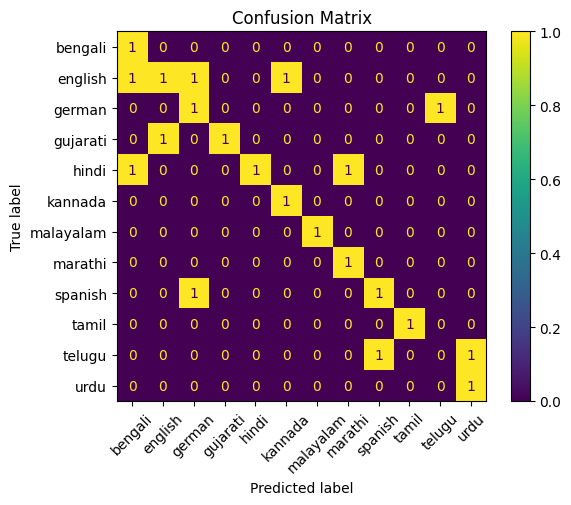

In [26]:
model = load_model('../data/models/language_detection_model_unscaled_v1.keras')
print(model.evaluate(X_test, y_test))

y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step - accuracy: 0.6190 - loss: 3.5087
[3.508674144744873, 0.6190476417541504]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

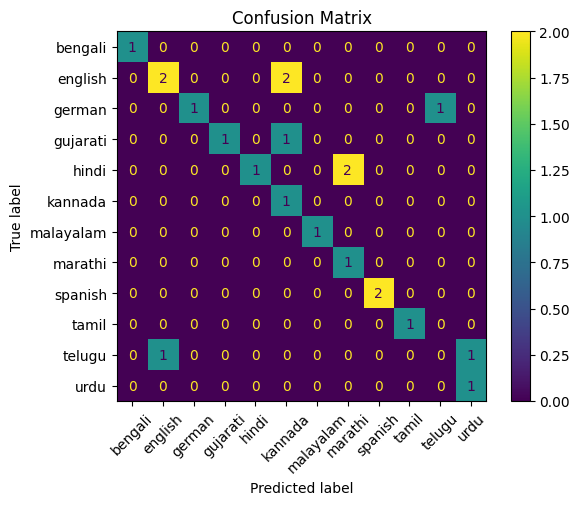

In [27]:
X_test_scaled = StandardScaler().fit_transform(X_test.reshape(-1, 58)).reshape(-1, 58, 1)

model = load_model('../data/models/language_detection_model_scaled_v1.keras')
print(model.evaluate(X_test_scaled, y_test))

y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

#### CNN Model

In [28]:
X_test = pd.read_parquet('../data/model_data/test_mfcc_feature_dataframe_v1.parquet')
y_test = X_test['language_label']

X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

language_labels_cols = list(pd.get_dummies(y_test, dtype=np.int32).columns.values)

X_test = X_test.reshape(-1, 58, 431, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

X_test.shape, y_test.shape

((21, 58, 431, 1), (21, 12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4762 - loss: 4.9198
[4.919818878173828, 0.4761904776096344]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

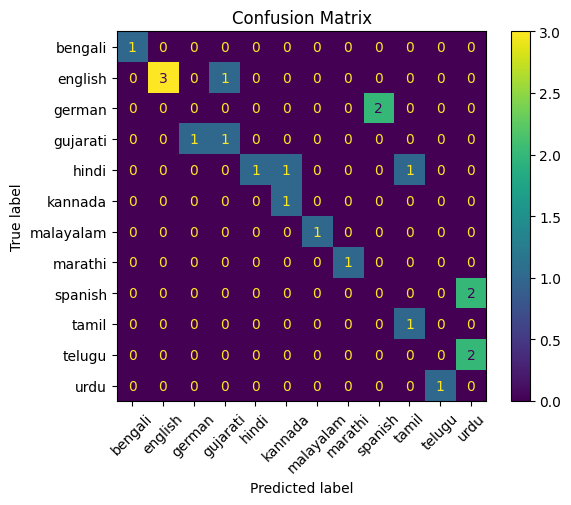

In [29]:
model = load_model('../data/models/language_detection_model_unscaled_v2.keras')
print(model.evaluate(X_test, y_test))

y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - accuracy: 0.4286 - loss: 9.9602
[9.96015453338623, 0.4285714328289032]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

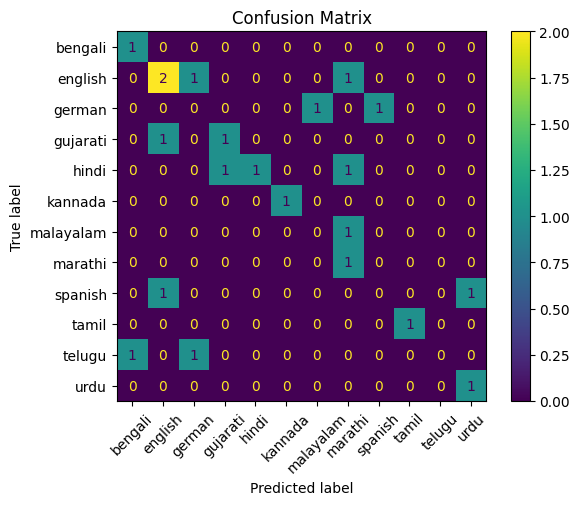

In [30]:
X_test_scaled = StandardScaler().fit_transform(X_test.reshape(-1, 58 * 431)).reshape(-1, 58, 431, 1)

model = load_model('../data/models/language_detection_model_scaled_v2.keras')
print(model.evaluate(X_test_scaled, y_test))

y_pred = model.predict(X_test_scaled)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

#### Ensembling of Models

In [31]:
def ensemble_v1(*probabilities: np.ndarray) -> tuple:
    probabilities = np.concatenate(probabilities, axis=0).reshape(-1, probabilities[0].shape[0], probabilities[0].shape[1])

    ind_prob_prod = np.prod(probabilities, axis=0)

    argmax_prob_label = np.argmax(ind_prob_prod, axis=1)
    max_prob = np.max(ind_prob_prod, axis=1)

    return argmax_prob_label, max_prob

def ensemble_v2(*probabilities: np.ndarray) -> tuple:
    probabilities = np.concatenate(probabilities, axis=0).reshape(-1, probabilities[0].shape[0], probabilities[0].shape[1])
    ensemble_prob_list = []

    top_3_labels = np.argsort(probabilities, axis=2)[:, :, -3:][:, :, ::-1]
    top_3_prob = np.sort(-np.partition(-probabilities, 3, axis=2)[:, :, :3], axis=2)[:, :, ::-1]

    for idx in range(top_3_labels.shape[1]):
        record_labels = top_3_labels[:, idx, :]
        record_probabilities = top_3_prob[:, idx, :]

        unique_labels, label_counts = np.unique(record_labels.flatten(), return_counts=True)

        max_count = np.max(label_counts)
        most_occuring_labels = unique_labels[label_counts == max_count]

        combined_prob_dict = {}

        for label in most_occuring_labels:
            label_indices = np.argwhere(record_labels == label)
            combined_prob = np.prod(record_probabilities[label_indices[:, 0], label_indices[:, 1]])
            combined_prob_dict[label] = combined_prob

        ensemble_prob_list.append(combined_prob_dict)

    max_prob_labels_with_prob = []

    for record_probs_dict in ensemble_prob_list:
        max_prob_label = max(record_probs_dict, key=record_probs_dict.get)
        max_prob = record_probs_dict[max_prob_label]

        max_prob_labels_with_prob.append({'label': max_prob_label, 'probability': max_prob})

    labels = [record['label'] for record in max_prob_labels_with_prob]
    probs = [record['probability'] for record in max_prob_labels_with_prob]

    return labels, probs

In [32]:
X_test = pd.read_parquet('../data/model_data/test_mfcc_feature_mean_dataframe_v1.parquet')
y_test = X_test['language_label']

X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

language_labels_cols = list(pd.get_dummies(y_test, dtype=np.int32).columns.values)

X_test = X_test.reshape(-1, 58, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

model = load_model('../data/models/language_detection_model_unscaled_v1.keras')
print(model.evaluate(X_test, y_test))

y_pred_model_1 = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step - accuracy: 0.5238 - loss: 2.7346
[2.7345874309539795, 0.523809552192688]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


In [33]:
X_test = pd.read_parquet('../data/model_data/test_mfcc_feature_mean_dataframe_v1.parquet')
y_test = X_test['language_label']

X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

language_labels_cols = list(pd.get_dummies(y_test, dtype=np.int32).columns.values)

X_test = X_test.reshape(-1, 58, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

X_test_scaled = StandardScaler().fit_transform(X_test.reshape(-1, 58)).reshape(-1, 58, 1)

model = load_model('../data/models/language_detection_model_scaled_v1.keras')
print(model.evaluate(X_test_scaled, y_test))

y_pred_model_2 = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6190 - loss: 3.5087
[3.508674144744873, 0.6190476417541504]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


In [34]:
X_test = pd.read_parquet('../data/model_data/test_mfcc_feature_dataframe_v1.parquet')
y_test = X_test['language_label']

X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

language_labels_cols = list(pd.get_dummies(y_test, dtype=np.int32).columns.values)

X_test = X_test.reshape(-1, 58, 431, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

model = load_model('../data/models/language_detection_model_unscaled_v2.keras')
print(model.evaluate(X_test, y_test))

y_pred_model_3 = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4762 - loss: 4.9198
[4.919818878173828, 0.4761904776096344]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


In [35]:
X_test = pd.read_parquet('../data/model_data/test_mfcc_feature_dataframe_v1.parquet')
y_test = X_test['language_label']

X_test = X_test.drop(columns=['language_label']).reset_index(drop=True).values

language_labels_cols = list(pd.get_dummies(y_test, dtype=np.int32).columns.values)

X_test = X_test.reshape(-1, 58, 431, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

X_test_scaled = StandardScaler().fit_transform(X_test.reshape(-1, 58 * 431)).reshape(-1, 58, 431, 1)

model = load_model('../data/models/language_detection_model_scaled_v2.keras')
print(model.evaluate(X_test_scaled, y_test))

y_pred_model_4 = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step - accuracy: 0.4286 - loss: 9.9602
[9.96015453338623, 0.4285714328289032]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


In [36]:
labels_v1, prob_v1 = ensemble_v1(y_pred_model_1, y_pred_model_2)
labels_v2, prob_v2 = ensemble_v2(y_pred_model_1, y_pred_model_2)

0.6190476190476191


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

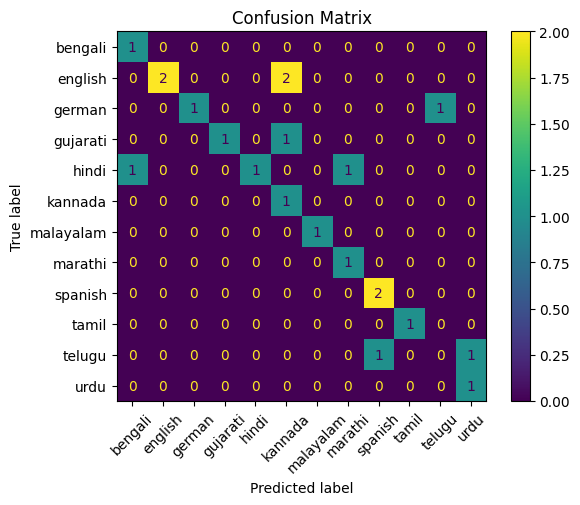

In [37]:
y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = list(labels_v1)

print(accuracy_score(y_test_argmax, y_pred_argmax))

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

0.6190476190476191


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

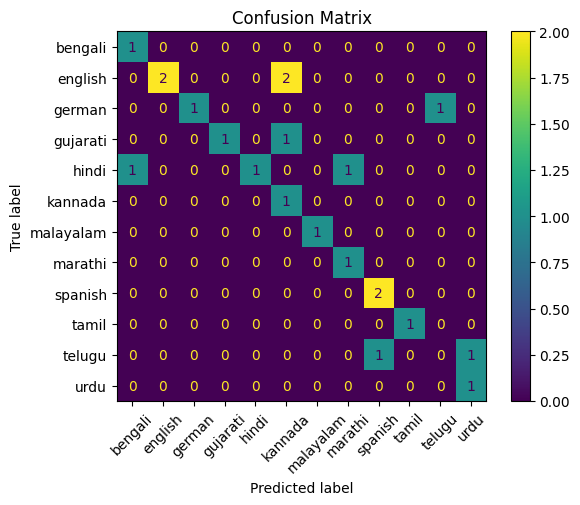

In [38]:
y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = list(labels_v2)

print(accuracy_score(y_test_argmax, y_pred_argmax))

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)